<a href="https://colab.research.google.com/github/IlyaKo4atkov/MyProjects/blob/main/Dataset_about_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Используя базу данных фильмов, взятых из открытых источников, проверил следующие гипотезы:

## 1. Большинство фильмов выпускаются по пятницам
## 2. Известные актеры снимаются в самых кассовых фильмах


## 1. Проверка гипотезы что большинство фильмов выпускаются по пятницам

In [1]:

from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")

with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset

# Папка с распакованным датасетом
FILE_PATH = './the_movies_dataset'

import os
os.listdir(FILE_PATH) #возвращает список имен файлов

import pandas as pd
import numpy as np
df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')
df.head()

<ipython-input-1-338a0c972b6f>:18: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


<Axes: title={'center': 'Число фильмов по дням недели'}, xlabel='Название дней недели', ylabel='Количество фильмов'>

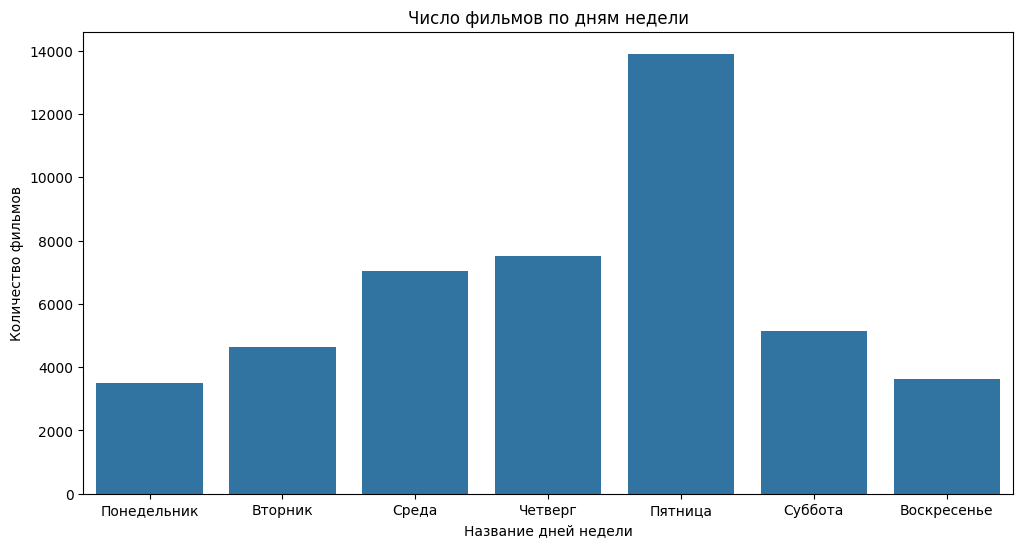

In [2]:
#Очистка данных
df = df.drop(['imdb_id'], axis=1)
df = df.drop(['adult'], axis=1) #тип билета (взрослый)
df = df.drop(['belongs_to_collection'], axis=1) #принадлежность к коллекции
df = df.drop(['homepage'], axis=1) #ссылка на фильм
df = df.drop(['video'], axis=1)
df = df.drop(['poster_path'], axis=1) #путь к обложке фильма
df = df.drop(['production_companies'], axis=1) #компания

#Для дальнейшего анализа даннаые кассового сбора, которые равны 0, пометим как NaN
df['revenue'] = df['revenue'].replace(0, np.nan)

df['budget'] = pd.to_numeric(df['budget'], errors='coerce') #str -> int
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()] #возвращая только те строки, где значение в столбце budget является NaN

#Создание функции, которая преобразовывает дату выхода фильма в день недели
day_week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
import datetime
def week_day(date): #функция с конструкцией исключения
  try:
    date_1 = str(date).split('-')
    res = datetime.date(int(date_1[0]), int(date_1[1]), int(date_1[2]))
    return day_week[res.weekday()]
  except:
    np.nan
df['day_week'] = df['release_date'].apply(week_day)

#Построение результирующего графика
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.title('Число фильмов по дням недели')
plt.xlabel('Название дней недели')
plt.ylabel('Количество фильмов')
sns.countplot(x='day_week', data = df, order=day_week)

## 2.Проверка гипотезы известные актеры снимаются в самых кассовых фильмах

In [ ]:

import pandas as pd
import numpy as np
credits_df = pd.read_csv('./the_movies_dataset/credits.csv')
credits_df.loc[1, 'cast']

"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt', 'order': 4, 'profile_path': '/7spiVQwmr

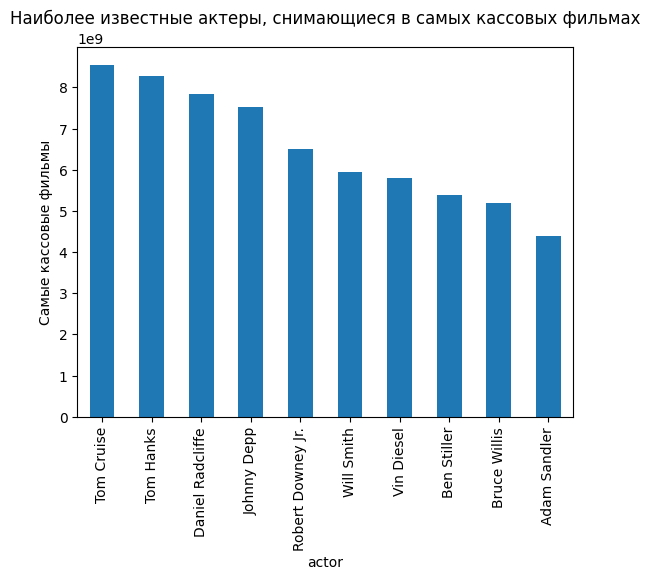

In [ ]:
def convert_int(x):
  try:
    return int(x)
  except:
    return np.nan

df['id'] = df['id'].apply(convert_int)

#Для удаления записей, содержащих NaN, необходимо использовать метод drop
df = df.drop(df[df['id'].isnull()].index)
df['id'] = df['id'].astype('int') #преобразование в int
df_merge = df.merge(credits_df, on='id') #метод объединения по столбцу id

#Использование библиотеки для преобразования строки в словарь так как в столбце cast есть список со словарями
import ast
df_merge['cast'] = df_merge['cast'].apply(ast.literal_eval)
def get_director(x):
  for i in x:
    if i['name'] != np.nan:
      return i['name']
    return np.nan
df_merge['actor'] = df_merge['cast'].apply(get_director)
df_merge['return'] = df_merge['revenue'] /  df['budget'] * 100
df_merge = df_merge[['actor', 'revenue', 'return', 'budget',	'runtime',	'vote_average',	'vote_count']]
plt.title('Наиболее известные актеры, снимающиеся в самых кассовых фильмах')
plt.xlabel('Имя актеров')
plt.ylabel('Кассовые сборы, в долларах')
df_merge.groupby('actor').sum().sort_values('revenue', ascending=False)['revenue'].head(10).plot(kind='bar')
plt.show()



